# Exploratory Data Analysis: Insurance Claims
This notebook explores the dataset to understand its structure, identify patterns and prepare for further analysis

## 1. Setup and Data Loading
We'll start by importing the necessary libraries and loading the dataset into a Pandas DataFrame. The dataset will be inspected for basic structure, types, and overview.

In [81]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: setting a style for plots
sns.set(style="whitegrid")

## 2. Loading the dataset
We'll load the dataset and preview its structure

In [83]:
# Load the dataset
file_path = '../data/insurance.csv'
df = pd.read_csv(file_path)

# Quick preview of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


_About the dataset:_
This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.
Age: The insured person's age.

- **Sex:** Gender (male or female) of the insured.
- **BMI (Body Mass Index):** A measure of body fat based on height and weight.
- **Children:** The number of dependents covered.
- **Smoker:** Whether the insured is a smoker (yes or no).
- **Region:** The geographic area of coverage.
- **Charges:** The medical insurance costs incurred by the insured person.

## 3. Inspect the data

### Dataset overview
Let's check the structure of the dataset, column names, and data types.

In [85]:
# Checking the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
# Displaying basic statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Dataset structure
- 1338 records with 7 columns
- no missing values in any columns
- mix of numerical (age, children, bmi, charges) and categorical (sex, smoker, region) data types

### Statistical summary
- Age: ranges 18-64, mean ~39 years, **fairly evenly distributed** (median 39)
- BMI: ranges 15.96--53.13, mean 30.66 (indicated overweight population)
- Children: median of 1 child / mean of 1.09, 25% have no children
- Charges: large standard deviation (USD 12,110) suggesting **high variability**. Significant **positive skew** (mean > median)

### Implications for Predictive Modelling
- **Target variable**: if predicting charges, note the wide range and skewed distribution.
   - Consider log transformation for charger
   - Watch for outliers (max charge is x5 the median)
- **Feature Engineering Opportunities:**
   - BMI categories (underweight, normal, overweight, obese)
   - Age groups
   - Family size
   - Interaction terms (e.g. smoker x age, smoker x BMI)
- **Potential relationships to explore**:
   - Impact of smoking status on charges
   - Relationship between BMI and charges
   - Age correlation with charges
   - Regional difference in charges
- **Model Consideration**:
   - No missing valies simplifies preprocessing
   - Categorical encoding needed for sex, smoker, region
   - Need to check for multicollinerarity
   - Consider both linear models and tree-based methods given potential non-linear relationships
- **Data quality**:
   -  Complete dataset with no missing values
   -  Check for outliers especially in BMI and charges
   -  Verify if BMI valies are realistic (e.g. max 53.13 is high but possible)

## 4. Perform univariate analysis
Here we'll explore the distributions of numerical and categorical variables

### Numerical variables
We'll analyse the distribution of numerical features using histograms and boxplots.

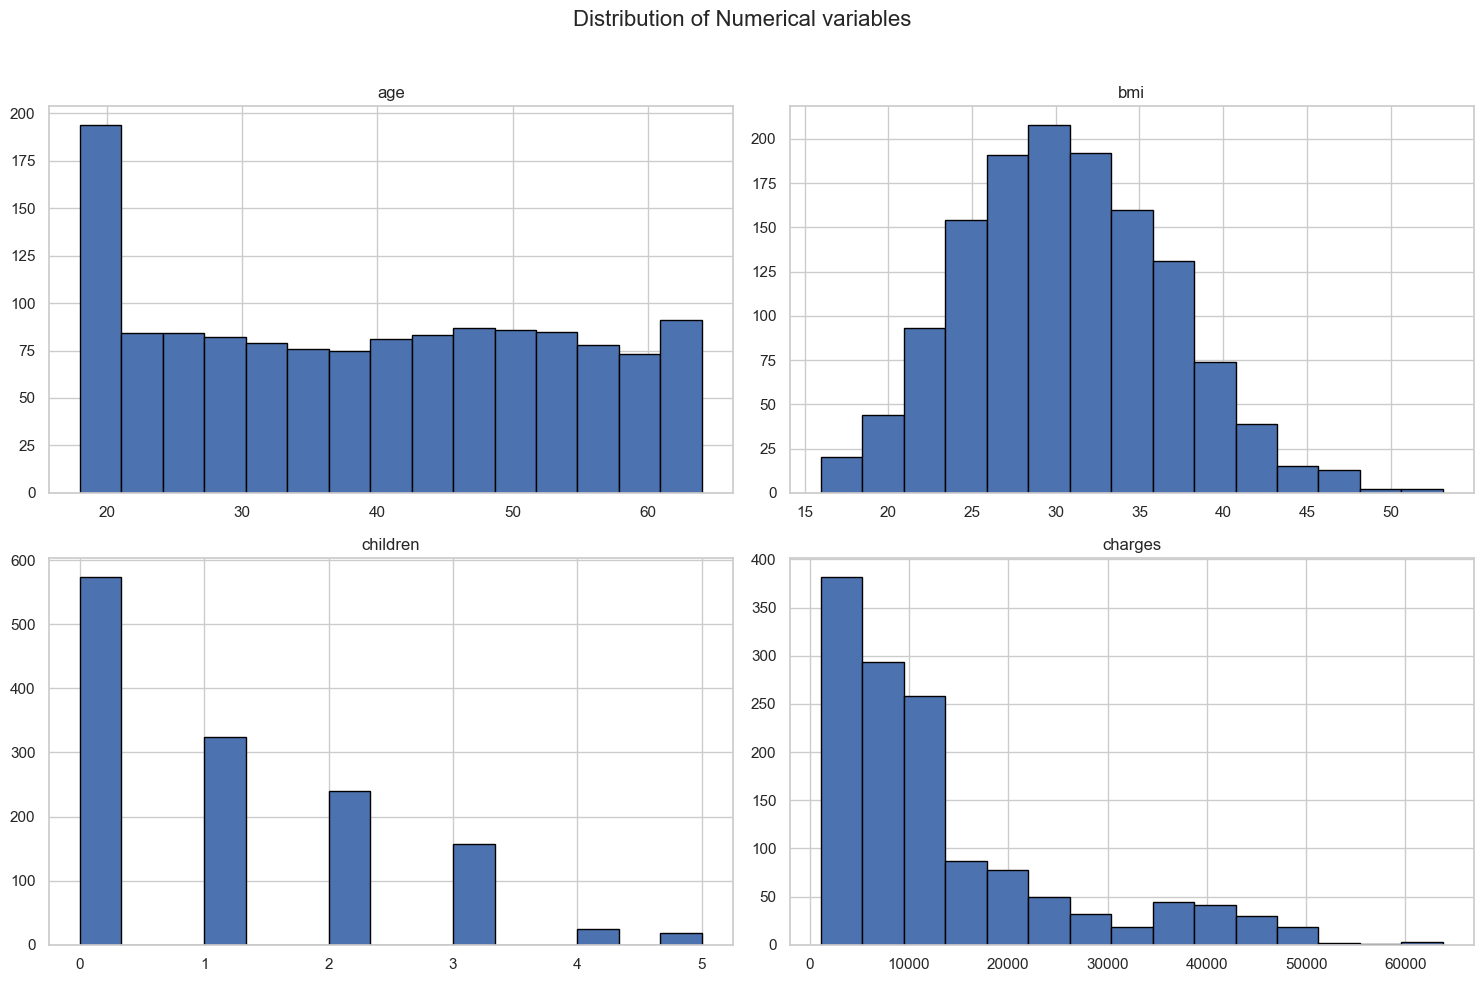

In [89]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns

# Plotting histograms
df[numerical_cols].hist(bins=15, figsize=(15,10), layout=(2,2), edgecolor="black")
plt.suptitle("Distribution of Numerical variables", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

### Categorical variables
We'll analyse the frequency of categorical features

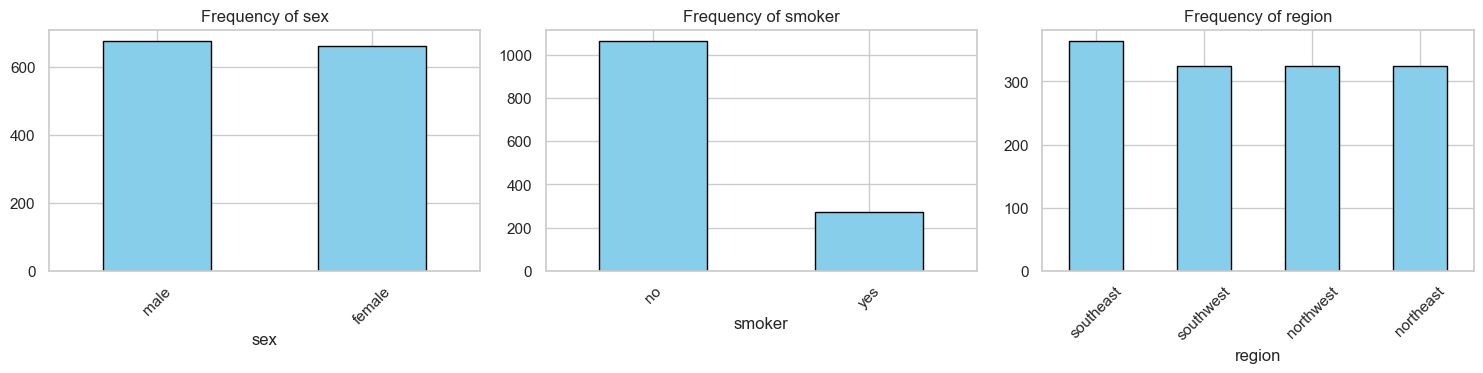

In [91]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=["object","category"])

# Plotting bar charts for categorical variables
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Perform Bivariate Analysis
Next we analyse the relationships between independent variables and the target variable.

### Bivariate analysis for categorical variables

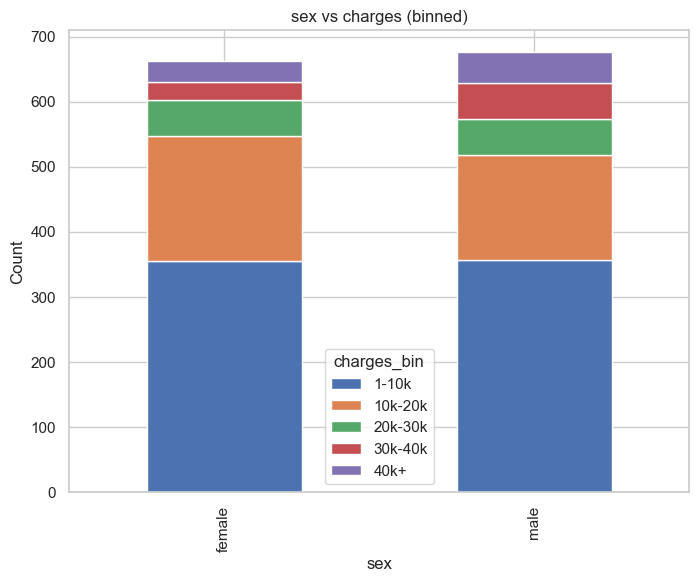

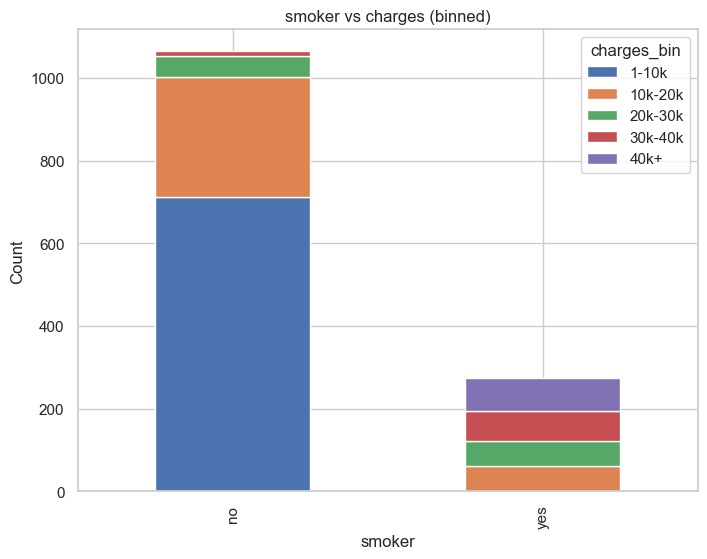

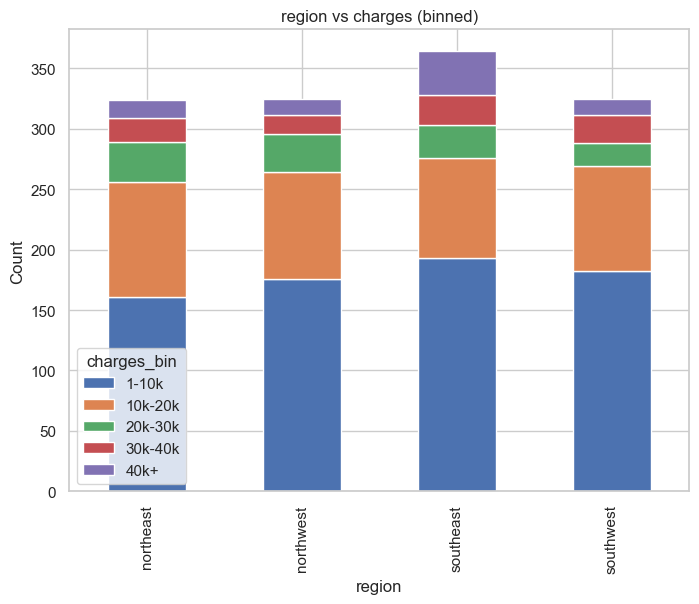

In [101]:
target_col = "charges"

# Problem: Using a continuous variable (charges) in crosstab
# Fix: Either bin the charges into categories or use a different visualization approach

# OPTION 1: Bin the charges into categories

# Define custom bins and labels
bins = [0, 10000, 20000, 30000, 40000, float('inf')]
labels = ['1-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# create a new binned column
df['charges_bin'] = pd.cut(df['charges'], bins=bins, labels=labels) 

# Plot the relationship between categorical columns and binned charges
for col in categorical_cols:
    pd.crosstab(df[col], df['charges_bin']).plot(kind="bar", stacked=True, figsize=(8,6))
    plt.title(f"{col} vs charges (binned)")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

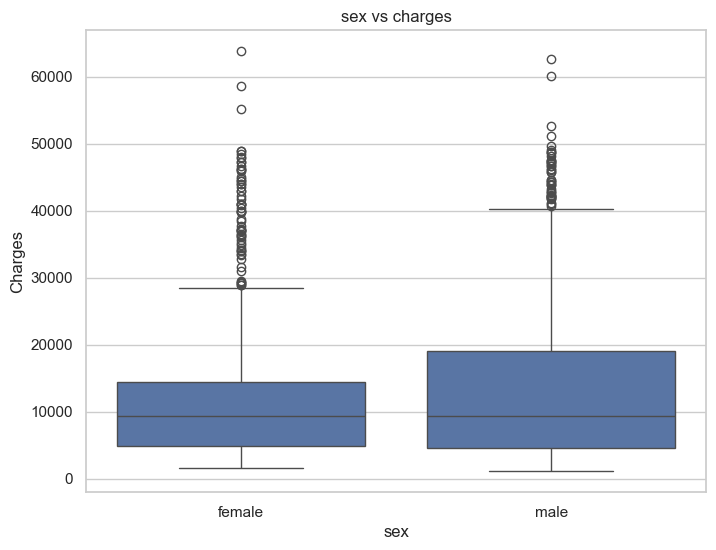

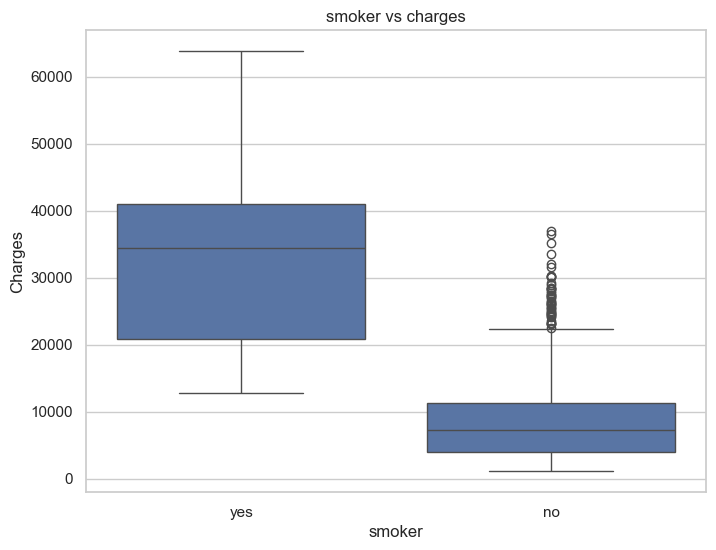

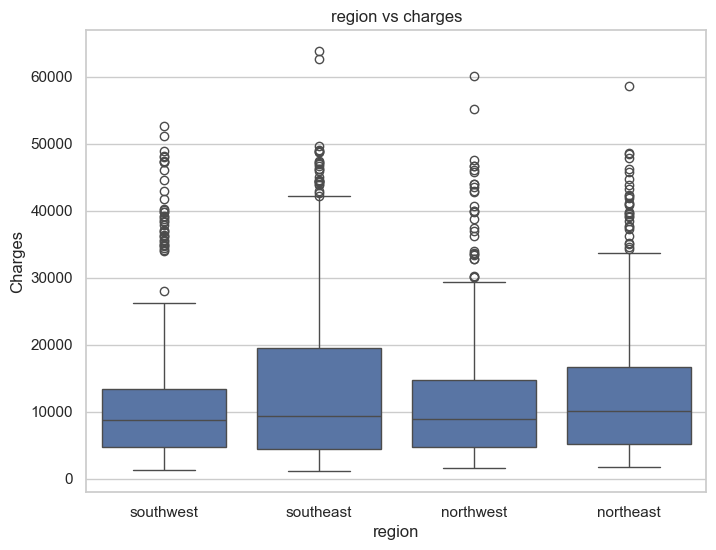

In [103]:
# OPTION 2: Use a different visualization like boxplot
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f"{col} vs charges")
    plt.ylabel("Charges")
    plt.xlabel(col)
    plt.show()


### Sex vs Charges
- The medain charges for makes and females appear relatively similar
- both groups show outliers int he higher charge tange (above 40k)
- There is a slight indication that males might have soemwhat higher median charge but the difference does not appear dramatic
- The interquartile ranges (box sizes) are comparable betweens sexes

### Smoker vs Charges
- There is a dramatic difference in charges between smokesr and non-smokers.
- Non-smokers have significantly lower media charges (around 10k-15k)
- Smokers have substantially higher median charges (around 30k-40k)
- The distribution for smokers is shifted much higher
- Non-smokers show some high outliers, but the overal distribution is much lower
- This suggest smoking status is strongly associated with insurance claims.

### Region vs charges
- The median charges across regions are fairly similar
- All regions show outliers in the higher charge ranges
- The southeast region might have slighter higher median than other regions
- Overall, regional differences appea less pronounced

The most significant relationship appears to be between smoking status and charges, with smokers incurring substantially hgiher insurance costs. Sex and region show less dramatic relationships with charges, though there may be subtle differences worth exploring further.

### Bivariate analysis for numerical variables

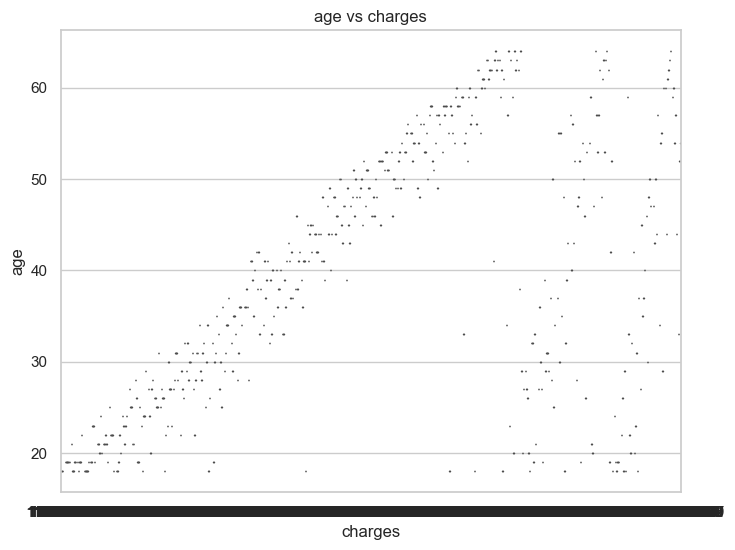

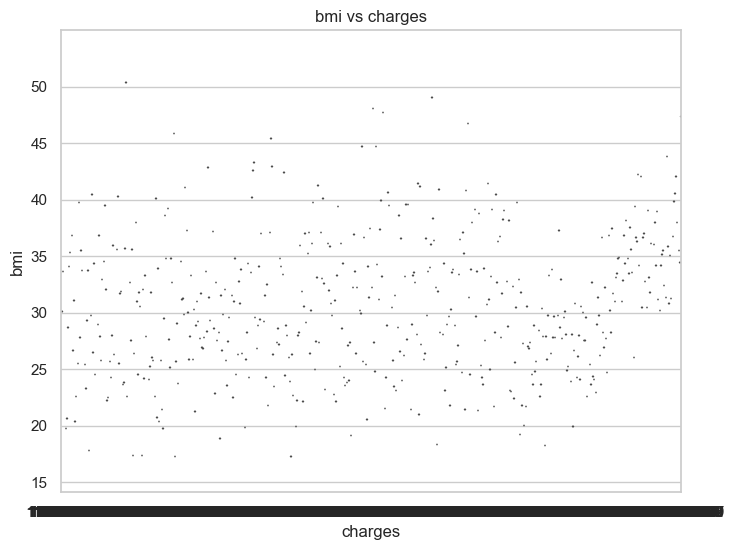

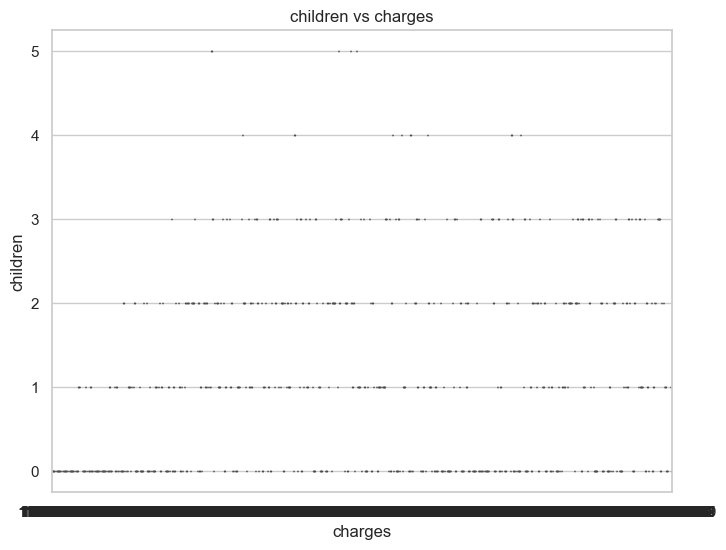

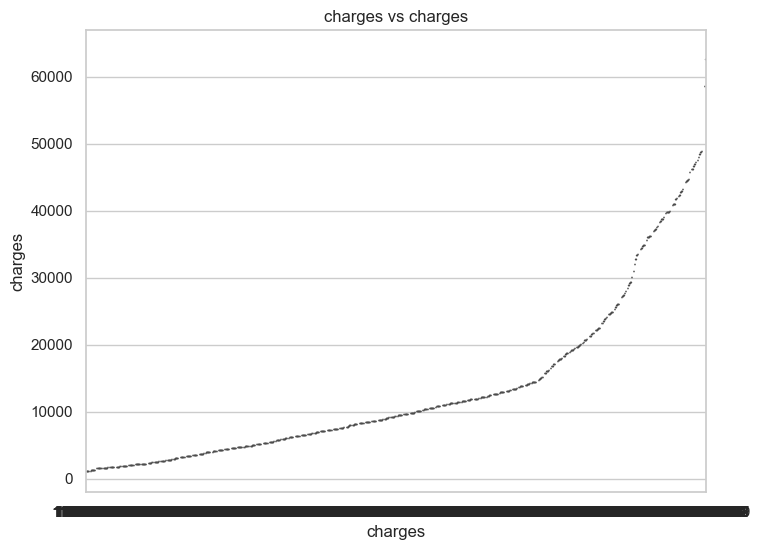

In [114]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x=target_col, y=col)
    plt.title(f"{col} vs {target_col}")
    plt.show()

### Age vs Charges
- There appears to be a positive correlation between age and insurance charges.
- As age increases, there is a general upward trend in charges.
- The relationship appears to be somewhat linear though with considerable variance
- There are some outliers visible, particularly in the hgiher charge ranges
- The spread of charges increases with age, suggesting more variability in costs for older individuals
- The pattern suggests that age is a predictor of insurance charges, though not the only determining factor


## 8. Correlation Analysis
We compute and visualise the correlation between numerical features

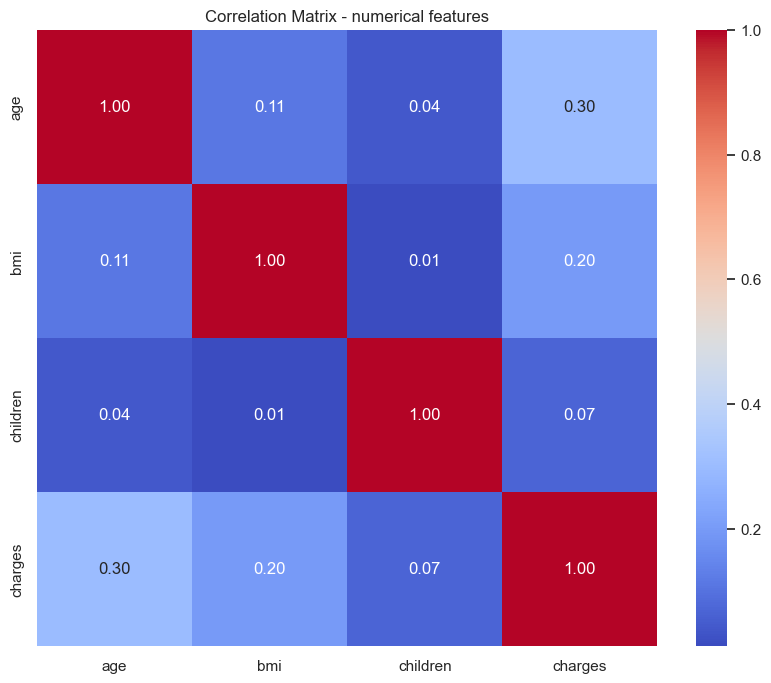

In [125]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix - numerical features")
plt.show()

- Age has a moderate positive correlation with charges (0.30), indicating that as age increases, insurance charges tend to increase as well. This supports the observation mentioned in the text above the matrix that "age is a predictor of insurance charges."

- BMI (Body Mass Index) shows a weak positive correlation with charges (0.20), suggesting that higher BMI values are somewhat associated with higher insurance costs, though the relationship is not strong.

- The number of children has a very weak positive correlation with charges (0.07), indicating that the number of dependents has minimal impact on insurance costs.

- Age and BMI have a weak positive correlation (0.11), showing a slight tendency for older individuals to have higher BMI values.

- Age and number of children have a very weak correlation (0.04), suggesting almost no relationship between a person's age and how many children they have in this dataset.

- BMI and number of children have a negligible correlation (0.01), indicating essentially no relationship between these variables.

- Overall, none of the variables show strong correlations with each other, suggesting that these factors might be relatively independent in determining insurance charges. The strongest predictor of charges appears to be age, but even this relationship is only moderate.